In [1]:
import graphlab 
from graphlab import SFrame
import math
import random
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

This non-commercial license of GraphLab Create for academic use is assigned to kobecool248@163.com and will expire on March 05, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1492682192.log


In [2]:
data=SFrame(data='/Volumes/SILVA/新媒体数据/待统计处理0407/合并表4.csv')
dataa,datab=data.random_split(0.1,seed=1)
dataa

Finished parsing file /Volumes/SILVA/新媒体数据/待统计处理0407/合并表4.csv

Parsing completed. Parsed 100 lines in 0.028765 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Volumes/SILVA/新媒体数据/待统计处理0407/合并表4.csv

Parsing completed. Parsed 765 lines in 0.008719 secs.

X1,Y
299,750200.0
307,630400.0
224,617000.0
361,594000.0
337,484000.0
232,451000.0
292,423600.0
289,419200.0
320,415600.0
292,268600.0


In [3]:
len(dataa)

78

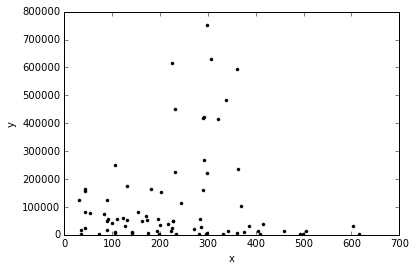

In [3]:
def plot_data(dataa):    
    plt.plot(dataa['X1'],dataa['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(dataa)

In [4]:
def polynomial_features(data, deg):
    data_copy=data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    return data_copy

In [5]:
polynomial_features(dataa, 4)

X1,Y,X2,X3,X4
299,750200.0,89401,26730899,7992538801
307,630400.0,94249,28934443,8882874001
224,617000.0,50176,11239424,2517630976
361,594000.0,130321,47045881,16983563041
337,484000.0,113569,38272753,12897917761
232,451000.0,53824,12487168,2897022976
292,423600.0,85264,24897088,7269949696
289,419200.0,83521,24137569,6975757441
320,415600.0,102400,32768000,10485760000
292,268600.0,85264,24897088,7269949696


In [5]:
def polynomial_regression(data, deg):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=0.,l1_penalty=0.,
                                              validation_set=None,verbose=False)
    return model

In [6]:
def plot_poly_predictions(data, model):
    plot_data(data)

    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1
    
    # Create 200 points in the x axis and compute the predicted value for each point
    x_pred = graphlab.SFrame({'X1':[i*10 for i in range(500)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    # plot predictions
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,500,0,600000])

In [7]:
def print_coefficients(model):    
    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1

    # Get learned parameters as a list
    w = list(model.coefficients['value'])

    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print 'Learned polynomial for degree ' + str(deg) + ':'
    w.reverse()
    print numpy.poly1d(w)

Class                          : LinearRegression

Schema
------
Number of coefficients         : 6
Number of examples             : 78
Number of feature columns      : 5
Number of unpacked features    : 5

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.0

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.0012

Settings
--------
Residual sum of squares        : 1.82824018285e+12
Training RMSE                  : 153097.9317

Highest Positive Coefficients
-----------------------------
(intercept)                    : 172426.3997
X2                             : 14.7181
X3                             : 0.0067
X5                             : 0.0

Lowest Negative Coefficients
----------------------------
X1                             : -2730.4963
X4                           

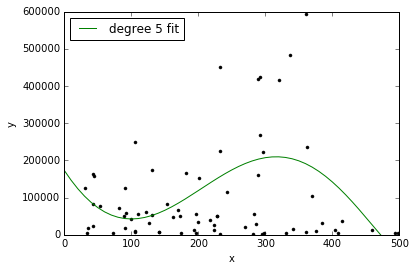

In [19]:
model = polynomial_regression(dataa, deg=5)
model.summary()
print_coefficients(model)
plot_poly_predictions(dataa,model)

Class                          : LinearRegression

Schema
------
Number of coefficients         : 8
Number of examples             : 78
Number of feature columns      : 7
Number of unpacked features    : 7

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.0

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.001

Settings
--------
Residual sum of squares        : 1.74214219165e+12
Training RMSE                  : 149449.5109

Highest Positive Coefficients
-----------------------------
X1                             : 16136.8937
X3                             : 1.5881
X5                             : 0.0
X7                             : 0.0

Lowest Negative Coefficients
----------------------------
(intercept)                    : -263152.9245
X2                             : 

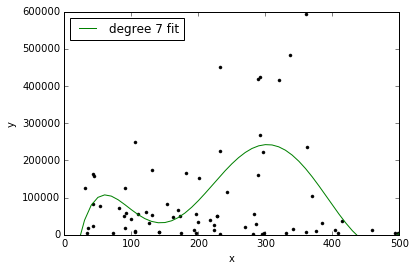

In [20]:
model = polynomial_regression(dataa, deg=7)
model.summary()
print_coefficients(model)
plot_poly_predictions(dataa,model)

Class                          : LinearRegression

Schema
------
Number of coefficients         : 10
Number of examples             : 78
Number of feature columns      : 9
Number of unpacked features    : 9

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.0

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.0014

Settings
--------
Residual sum of squares        : 1.74018008869e+12
Training RMSE                  : 149365.3278

Highest Positive Coefficients
-----------------------------
X1                             : 16531.8187
X3                             : 1.6092
X5                             : 0.0
X7                             : 0.0
X8                             : 0.0

Lowest Negative Coefficients
----------------------------
(intercept)                    : -272950

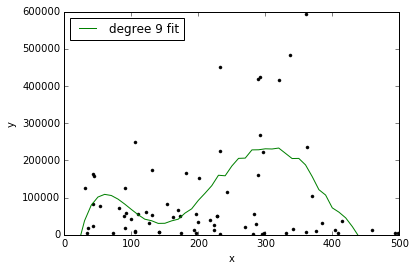

In [21]:
model = polynomial_regression(dataa, deg=9)
model.summary()
print_coefficients(model)
plot_poly_predictions(dataa,model)

Class                          : LinearRegression

Schema
------
Number of coefficients         : 12
Number of examples             : 78
Number of feature columns      : 11
Number of unpacked features    : 11

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.0

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.0017

Settings
--------
Residual sum of squares        : 1.70409597017e+12
Training RMSE                  : 147808.6068

Highest Positive Coefficients
-----------------------------
X1                             : 15743.2016
X3                             : 1.5835
X5                             : 0.0
X7                             : 0.0
X8                             : 0.0

Lowest Negative Coefficients
----------------------------
(intercept)                    : -2514

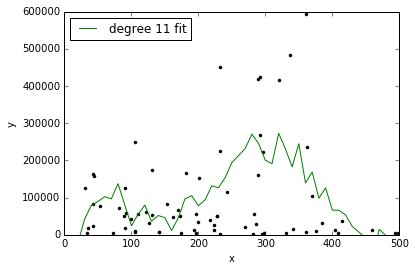

In [22]:
model = polynomial_regression(dataa, deg=11)
model.summary()
print_coefficients(model)
plot_poly_predictions(dataa,model)

In [8]:
def polynomial_ridge_regression(data, deg, l2_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=l2_penalty,
                                              validation_set=None,verbose=False)
    return model

lambda = 1.00e-06
Learned polynomial for degree 9:
            9             8             7             6             5
-2.298e-16 x + 1.082e-15 x + 1.045e-14 x - 2.457e-09 x + 4.722e-06 x
             4        3         2
 - 0.003382 x + 1.11 x - 167.1 x + 1.043e+04 x - 1.3e+05


lambda = 1.00e-03
Learned polynomial for degree 9:
            9             8             7             6             5
-2.736e-17 x + 9.738e-16 x + 9.796e-15 x + 1.147e-10 x - 1.253e-08 x
              4            3         2
 - 5.791e-05 x - 0.004263 x + 15.24 x - 2684 x + 1.687e+05


lambda = 1.00e+02
Learned polynomial for degree 9:
            9             8             7             6             5
-9.694e-17 x + 4.888e-16 x - 3.473e-15 x - 8.825e-13 x - 4.642e-10 x
              4             3         2
 - 1.842e-07 x - 1.696e-05 x + 0.046 x + 30.42 x + 1.127e+05


lambda = 1.00e+03
Learned polynomial for degree 9:
            9             8             7             6             5
-1.058e-17 x 

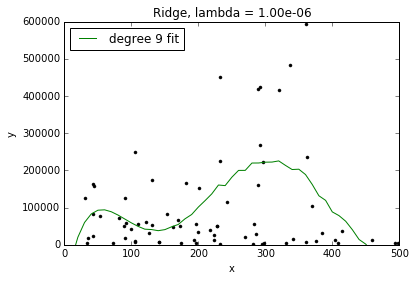

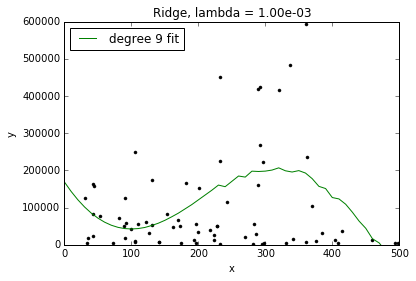

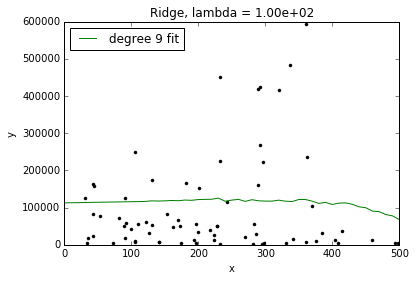

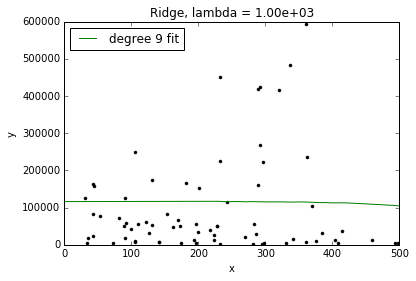

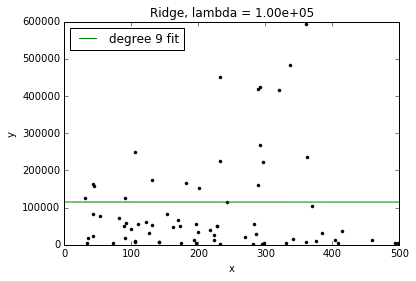

In [24]:
for l2_penalty in [  1e-6, 1e-3, 1e2, 1e3,1e5]:
    model = polynomial_ridge_regression(dataa, deg=9, l2_penalty=l2_penalty)
    print 'lambda = %.2e' % l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_poly_predictions(dataa,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)

In [9]:
def loo(dataa, deg, l2_penalty_values):
    # Create polynomial features
    data = polynomial_features(dataa, deg)
    
    # Create as many folds for cross validatation as number of data points
    num_folds = len(data)
    folds = graphlab.cross_validation.KFold(data,num_folds)
    
    # for each value of l2_penalty, fit a model for each fold and compute average MSE
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            # train model
            model = graphlab.linear_regression.create(train_set,target='Y', 
                                                      l2_penalty=l2_penalty,
                                                      validation_set=None,verbose=False)
            
            # predict on validation set 
            y_test_predicted = model.predict(validation_set)
            # compute squared error
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()
        
        # save squared error in list of MSE for each l2_penalty
        next_mse = next_mse/num_folds
        l2_penalty_mse.append(next_mse)
        if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_l2_penalty = l2_penalty
            
    return l2_penalty_mse,best_l2_penalty

In [10]:
l2_penalty_values = numpy.logspace(-4, 10, num=10)
l2_penalty_mse,best_l2_penalty = loo(dataa, 9, l2_penalty_values)

In [16]:
best_l2_penalty

4.641588833612782

Learned polynomial for degree 9:
           9             8             7            6             5
3.815e-16 x + 1.579e-15 x - 1.844e-14 x - 3.97e-12 x - 2.236e-09 x
              4            3          2
 - 8.062e-07 x + 0.000158 x + 0.4722 x + 242.7 x + 5.667e+04


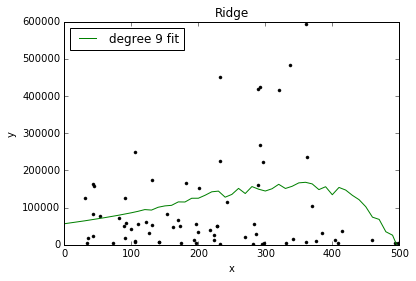

In [15]:
best_l2_penalty
model = polynomial_ridge_regression(dataa, deg=9, l2_penalty=best_l2_penalty)
print_coefficients(model)
plt.figure()
plot_poly_predictions(dataa,model)
plt.title('Ridge')

In [ ]:
model = polynomial_regression(dataa, deg=9)
model.summary()
print_coefficients(model)
plot_poly_predictions(dataa,model)

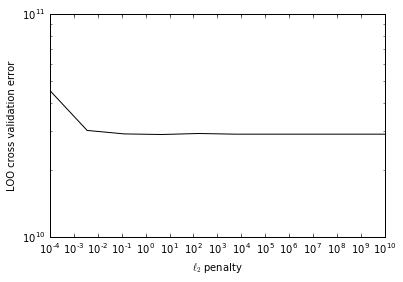

In [16]:
plt.plot(l2_penalty_values,l2_penalty_mse,'k-')
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('LOO cross validation error')
plt.xscale('log')
plt.yscale('log')

In [20]:
def polynomial_lasso_regression(data, deg, l1_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=0.,
                                              l1_penalty=l1_penalty,
                                              validation_set=None, 
                                              solver='fista', verbose=False,
                                              max_iterations=3000, convergence_threshold=1e-10)
    return model

l1_penalty = 1.000000e+00
number of nonzeros = 9
Learned polynomial for degree 8:
           8            7             6            5             4
9.045e-16 x + 1.12e-14 x + 9.523e-11 x + 2.12e-08 x - 7.378e-05 x
             3         2
 - 0.004809 x + 17.05 x - 3017 x + 1.829e+05


l1_penalty = 1.000000e+02
number of nonzeros = 9
Learned polynomial for degree 8:
           8             7             6             5             4
9.092e-16 x + 1.117e-14 x + 9.507e-11 x + 2.214e-08 x - 7.515e-05 x
             3         2
 - 0.003984 x + 16.83 x - 2992 x + 1.821e+05


l1_penalty = 1.000000e+04
number of nonzeros = 8
Learned polynomial for degree 8:
           8             7             6             5             4
1.068e-15 x + 2.761e-15 x + 8.413e-11 x + 9.015e-11 x - 5.412e-05 x
          2
 + 11.34 x - 1930 x + 1.339e+05


l1_penalty = 1.000000e+05
number of nonzeros = 6
Learned polynomial for degree 8:
           8             7             4         2
1.373e-15 x - 2.046e-14 

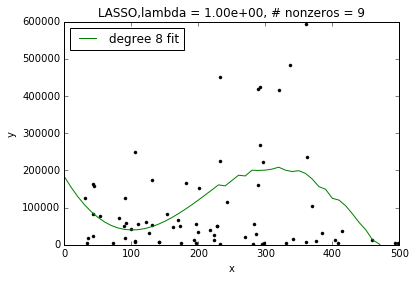

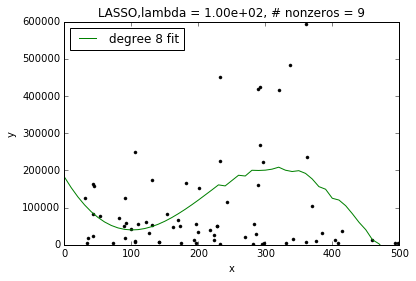

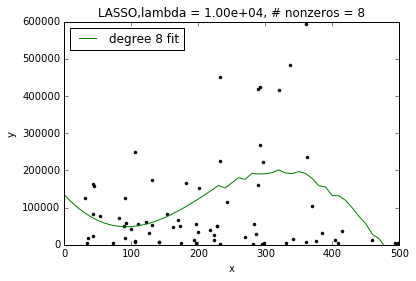

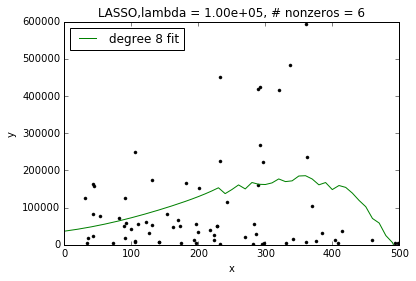

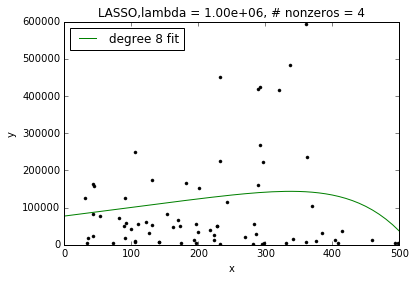

In [33]:
for l1_penalty in [ 1,100,10000,100000,1000000]:
    model = polynomial_lasso_regression(dataa, deg=8, l1_penalty=l1_penalty)
    print 'l1_penalty = %e' % l1_penalty
    print 'number of nonzeros = %d' % (model.coefficients['value']).nnz()
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_poly_predictions(dataa,model)
    plt.title('LASSO,lambda = %.2e, # nonzeros = %d' % (l1_penalty, (model.coefficients['value']).nnz()))